In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-reddit-climate-change-dataset/the-reddit-climate-change-dataset-comments.csv
/kaggle/input/the-reddit-climate-change-dataset/the-reddit-climate-change-dataset-posts.csv


To Do List

Preprocessing: 
* Clean data to just be about housing related ideas
* Remove any extraneous words (?)
* sentiment analysis for each subreddit
* use spacy


1. Calculate monthly average sentiment for comments from Jan 2010 to Aug 2022
2. 50 most frequently mentioned people (people/locations, positive/negative sentiment)

In [6]:
#load in data (DO NOT run with bad wifi!)
climate_ds = pd.read_csv("/kaggle/input/the-reddit-climate-change-dataset/the-reddit-climate-change-dataset-comments.csv")

In [7]:
#sanity check to make sure we are accessing data properly
climate_ds.head(3)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
0,comment,imlddn9,2qh3l,news,False,1661990368,https://old.reddit.com/r/news/comments/x2cszk/...,Yeah but what the above commenter is saying is...,0.5719,2
1,comment,imldbeh,2qn7b,ohio,False,1661990340,https://old.reddit.com/r/Ohio/comments/x2awnp/...,Any comparison of efficiency between solar and...,-0.9877,2
2,comment,imldado,2qhma,newzealand,False,1661990327,https://old.reddit.com/r/newzealand/comments/x...,I'm honestly waiting for climate change and th...,-0.1143,1


In [8]:
climate_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600698 entries, 0 to 4600697
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   id              object 
 2   subreddit.id    object 
 3   subreddit.name  object 
 4   subreddit.nsfw  bool   
 5   created_utc     int64  
 6   permalink       object 
 7   body            object 
 8   sentiment       float64
 9   score           int64  
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 320.3+ MB


In [9]:
print(f"Total entries before filtering: {len(climate_ds)}")

# Define the words you want to look for
words_to_look_for = ['housing', 'landlord', 'house', 'home', 'apartment', 'rent', 'mortgage']

# create a regex, use word boundaries to prevent partial matching (like 'home' in 'homework')
pattern = '|'.join([f'\\b{word}\\b' for word in words_to_look_for])

# Filter the DataFrame for rows where 'body' contains any of the words
climate_housing_ds = climate_ds[climate_ds['body'].str.contains(pattern, case=False, na=False)]

pd.set_option('display.max_colwidth', None) #wider columns to read comment
climate_housing_ds[['body']].head(3)

Total entries before filtering: 4600698


,body
1,"Any comparison of efficiency between solar and fossil fuels is nonsensical at best and intentionally misleading at worst. In no universe is light -&gt; photovoltaic cell -&gt; electricity less efficient than light -&gt; entire food chain -&gt; biomass -&gt; decomposition -&gt; millions of years of geothermal heat and pressure -&gt; extraction -&gt; refining and transport -&gt; burning -&gt; turbine generator -&gt; electricity.\n\nUgly? More ugly than power lines, roads, apartment buildings, tractors, fences, etc etc etc? You're simply not used to it. Also, who cares? Sure, millions of people died in the displacement from sea rise, famines cause by climate change, and wars from resource scarcity, but thank God we didn't have to look at those solar panels occasionally.\n\nOffshore fracking? Fucks sake. Have you already forgotten the deepwater horizon disaster? Think about the damage that did to the gulf coast, add a few million barrels of highly toxic fracking fluid to the mix, and there you have our next major environmental disaster courtesy of offshore fracking. But oh man, those solar panels sure are ugly.\n\nStop repeating the lies fed to you by the people getting rich from fossil fuels, who couldn't care less about you or your descendants as long as they get theirs. We can deal with the less environmentally friendly aspects of solar power. We cannot deal with the consequences of continuing to pump carbon into the atmosphere. Y'all need to grow the fuck up and stop whining about the view."
12,"From California, very near the coast. We're not supposed to be hit too badly\*, but I am looking for a second home in Northern Minneapolis, Eastern Wisconsin, all of Michigan near the water, and Northeast Ohio, so i can go to once things get worse (10-15 years).\n\nI already visited a few of these places; the Cleveland suburbs were especially nice and still affordable. Duluth MN is ok, but i dont think it can handle a big influx of people. Cleveland used to be the 4th largest city in the country, so they have the infrustructure already built; they would just need to re-inforce it/rebuild it to handle an influx of people. **Let me know if you disagree, as Cleveland is my top choice right now.**\n\nYes, these places aren't that great right now, but once climate change gets worse, they will get better. IE; they are starting to experience shorter winters:[https://www.cleveland19.com/2022/02/05/has-it-really-been-bad-winter-so-far/](https://www.cleveland19.com/2022/02/05/has-it-really-been-bad-winter-so-far/)\n\n&amp;#x200B;\n\n\*\n\n* our state government is working on building more water storage and recycling as currently 50% of water that falls in the state is not harvested\n* we are only recycling about 10% of water, if we can do more it would make a big difference\n* 40% of water that is harvested is used for agriculture, only about 10% is used for cities, so we might have to stop farming so much\n* Coastal California and Bay area are not going to get too hot\n* California will only have about 1 foot of sea level rise\n\n&amp;#x200B;\n\nAlso, I recently stumbled on this youtube channel; she's a scientist talking about each state and what they can expect in the future with regards to climate change: \nhttps://www.youtube.com/c/AmericanResiliency"
15,"Or idk, climate change? Lack of affordable housing? Time out of my day? Unnecessary wear on my vehicle I can barely afford to keep running that's primary reason for existing is to get to and from work in the first place?"


Other words that can be included
'real estate agent', 'broker', 'lease','down payment', 'property tax', 'appraisal', 
'foreclosure', 'short sale', 'escrow', 'closing costs', 'commission', 
'home inspection', 'pre-approval', 'debt-to-income ratio', 'adjustable-rate mortgage',
'inventory', 'zoning','capital gains tax', 'homeowners association', 'deed'

In [10]:
climate_housing_ds.info()
climate_housing_ds.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 222447 entries, 1 to 4600691
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   type            222447 non-null  object 
 1   id              222447 non-null  object 
 2   subreddit.id    222447 non-null  object 
 3   subreddit.name  222447 non-null  object 
 4   subreddit.nsfw  222447 non-null  bool   
 5   created_utc     222447 non-null  int64  
 6   permalink       222447 non-null  object 
 7   body            222447 non-null  object 
 8   sentiment       222200 non-null  float64
 9   score           222447 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 17.2+ MB


,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
1,comment,imldbeh,2qn7b,ohio,False,1661990340,https://old.reddit.com/r/Ohio/comments/x2awnp/state_government_may_soon_kill_a_solar_project_in/imldbeh/,"Any comparison of efficiency between solar and fossil fuels is nonsensical at best and intentionally misleading at worst. In no universe is light -&gt; photovoltaic cell -&gt; electricity less efficient than light -&gt; entire food chain -&gt; biomass -&gt; decomposition -&gt; millions of years of geothermal heat and pressure -&gt; extraction -&gt; refining and transport -&gt; burning -&gt; turbine generator -&gt; electricity.\n\nUgly? More ugly than power lines, roads, apartment buildings, tractors, fences, etc etc etc? You're simply not used to it. Also, who cares? Sure, millions of people died in the displacement from sea rise, famines cause by climate change, and wars from resource scarcity, but thank God we didn't have to look at those solar panels occasionally.\n\nOffshore fracking? Fucks sake. Have you already forgotten the deepwater horizon disaster? Think about the damage that did to the gulf coast, add a few million barrels of highly toxic fracking fluid to the mix, and there you have our next major environmental disaster courtesy of offshore fracking. But oh man, those solar panels sure are ugly.\n\nStop repeating the lies fed to you by the people getting rich from fossil fuels, who couldn't care less about you or your descendants as long as they get theirs. We can deal with the less environmentally friendly aspects of solar power. We cannot deal with the consequences of continuing to pump carbon into the atmosphere. Y'all need to grow the fuck up and stop whining about the view.",-0.9877,2
12,comment,imlca5e,4tly53,collapseprep,False,1661989877,https://old.reddit.com/r/CollapsePrep/comments/x2awmq/when_you_are_a_climate_refugee_where_do_you_go/imlca5e/,"From California, very near the coast. We're not supposed to be hit too badly\*, but I am looking for a second home in Northern Minneapolis, Eastern Wisconsin, all of Michigan near the water, and Northeast Ohio, so i can go to once things get worse (10-15 years).\n\nI already visited a few of these places; the Cleveland suburbs were especially nice and still affordable. Duluth MN is ok, but i dont think it can handle a big influx of people. Cleveland used to be the 4th largest city in the country, so they have the infrustructure already built; they would just need to re-inforce it/rebuild it to handle an influx of people. **Let me know if you disagree, as Cleveland is my top choice right now.**\n\nYes, these places aren't that great right now, but once climate change gets worse, they will get better. IE; they are starting to experience shorter winters:[https://www.cleveland19.com/2022/02/05/has-it-really-been-bad-winter-so-far/](https://www.cleveland19.com/2022/02/05/has-it-really-been-bad-winter-so-far/)\n\n&amp;#x200B;\n\n\*\n\n* our state government is working on building more water storage and recycling as currently 50% of water that falls in the state is not harvested\n* we are only recycling about 10% of water, if we can do more it would make a big difference\n* 40% of water that is harvested is used for agriculture, only about 10% is used for cities, so we might have to stop farming so much\n* Coastal California and Bay area are not going to get too hot\n* California will only have about 1 foot of sea level rise\n\n&amp;#x200B;\n\nAlso, I recently stumbled on this youtube channel; she's a scientist talking about each state and what they can expect in the future with regards to climate change: \nhttps://www.youtube.com/c/AmericanResiliency",-0.8048,9
15,comment,imlc2xd,2qi2i,portland,False,1661989788,https://old.reddit.com/r/Portland/comments/x2ilvq/hundreds_of_portland_city_workers_resist_calls_to/imlc2xd/,"Or idk, climate change? Lack of affordable housing? Time out of my day? Unnecessary wear on my vehicle I can bar

In [12]:
climate_housing_ds.head(3)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
1,comment,imldbeh,2qn7b,ohio,False,1661990340,https://old.reddit.com/r/Ohio/comments/x2awnp/state_government_may_soon_kill_a_solar_project_in/imldbeh/,"Any comparison of efficiency between solar and fossil fuels is nonsensical at best and intentionally misleading at worst. In no universe is light -&gt; photovoltaic cell -&gt; electricity less efficient than light -&gt; entire food chain -&gt; biomass -&gt; decomposition -&gt; millions of years of geothermal heat and pressure -&gt; extraction -&gt; refining and transport -&gt; burning -&gt; turbine generator -&gt; electricity.\n\nUgly? More ugly than power lines, roads, apartment buildings, tractors, fences, etc etc etc? You're simply not used to it. Also, who cares? Sure, millions of people died in the displacement from sea rise, famines cause by climate change, and wars from resource scarcity, but thank God we didn't have to look at those solar panels occasionally.\n\nOffshore fracking? Fucks sake. Have you already forgotten the deepwater horizon disaster? Think about the damage that did to the gulf coast, add a few million barrels of highly toxic fracking fluid to the mix, and there you have our next major environmental disaster courtesy of offshore fracking. But oh man, those solar panels sure are ugly.\n\nStop repeating the lies fed to you by the people getting rich from fossil fuels, who couldn't care less about you or your descendants as long as they get theirs. We can deal with the less environmentally friendly aspects of solar power. We cannot deal with the consequences of continuing to pump carbon into the atmosphere. Y'all need to grow the fuck up and stop whining about the view.",-0.9877,2
12,comment,imlca5e,4tly53,collapseprep,False,1661989877,https://old.reddit.com/r/CollapsePrep/comments/x2awmq/when_you_are_a_climate_refugee_where_do_you_go/imlca5e/,"From California, very near the coast. We're not supposed to be hit too badly\*, but I am looking for a second home in Northern Minneapolis, Eastern Wisconsin, all of Michigan near the water, and Northeast Ohio, so i can go to once things get worse (10-15 years).\n\nI already visited a few of these places; the Cleveland suburbs were especially nice and still affordable. Duluth MN is ok, but i dont think it can handle a big influx of people. Cleveland used to be the 4th largest city in the country, so they have the infrustructure already built; they would just need to re-inforce it/rebuild it to handle an influx of people. **Let me know if you disagree, as Cleveland is my top choice right now.**\n\nYes, these places aren't that great right now, but once climate change gets worse, they will get better. IE; they are starting to experience shorter winters:[https://www.cleveland19.com/2022/02/05/has-it-really-been-bad-winter-so-far/](https://www.cleveland19.com/2022/02/05/has-it-really-been-bad-winter-so-far/)\n\n&amp;#x200B;\n\n\*\n\n* our state government is working on building more water storage and recycling as currently 50% of water that falls in the state is not harvested\n* we are only recycling about 10% of water, if we can do more it would make a big difference\n* 40% of water that is harvested is used for agriculture, only about 10% is used for cities, so we might have to stop farming so much\n* Coastal California and Bay area are not going to get too hot\n* California will only have about 1 foot of sea level rise\n\n&amp;#x200B;\n\nAlso, I recently stumbled on this youtube channel; she's a scientist talking about each state and what they can expect in the future with regards to climate change: \nhttps://www.youtube.com/c/AmericanResiliency",-0.8048,9
15,comment,imlc2xd,2qi2i,portland,False,1661989788,https://old.reddit.com/r/Portland/comments/x2ilvq/hundreds_of_portland_city_workers_resist_calls_to/imlc2xd/,"Or idk, climate change? Lack of affordable housing? Time out of my day? Unnecessary wear on my vehicle I can bar

In [13]:
#get the subreddits that appear the most often
#pd.set_option('display.max_colwidth', None) #wider columns to read comment
#climate_housing_ds[['body']].head(3)

subreddit_counts = climate_housing_ds['subreddit.name'].value_counts()
print(subreddit_counts)

subreddit.name
politics                 20242
worldnews                11152
askreddit                 8655
collapse                  4800
canada                    3786
                         ...  
istj                         1
howtodraw101                 1
zoning                       1
ihaveihaveihavereddit        1
politicspdfs                 1
Name: count, Length: 9410, dtype: int64


In [48]:
#splice our dataset based on the top 5 (politics, worldnews, askreddit, collapse, canada

subreddits_to_keep = ['canada']

# Filter the DataFrame to only include rows where 'subreddit.name' is in subreddits_to_keep
top_climate_housing_ds = climate_housing_ds[climate_housing_ds['subreddit.name'].isin(subreddits_to_keep)]

# Display the filtered DataFrame
top_climate_housing_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3786 entries, 8 to 222332
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   level_0         3786 non-null   int64  
 1   index           3786 non-null   int64  
 2   type            3786 non-null   object 
 3   id              3786 non-null   object 
 4   subreddit.id    3786 non-null   object 
 5   subreddit.name  3786 non-null   object 
 6   subreddit.nsfw  3786 non-null   bool   
 7   created_utc     3786 non-null   int64  
 8   permalink       3786 non-null   object 
 9   body            3786 non-null   object 
 10  sentiment       3786 non-null   float64
 11  score           3786 non-null   int64  
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 358.6+ KB


In [60]:
top_climate_housing_ds.head(3)

,level_0,index,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score,tokens
8,8,94,comment,iml7b24,2qh68,canada,False,1661987686,https://old.reddit.com/r/canada/comments/x2ii0u/trudeaus_green_obsession_is_canadas_nightmare/iml7b24/,"I'm not running from anything.\n\nI haven't expressed a single clear position in this thread other than our politicians are clearly failing us on the topic of climate change. Which is the truth.\n\nYou keep saying ""conservatives conservatives conservatives conservatives conservatives conservatives conservatives conservatives conservatives conservatives conservatives conservatiiiiiiives!!!1!!""\n\nWhile the evidence now clearly shows that both major parties are very much guilty of not doing much of anything useful.\n\nYou can say ""Yeah but cOnSeRvAtIvEs aRe WoRsE!!1!"" Until the cows come home if you want but all you sound like is a broken record.\n\nOur emissions have increased since signing the Paris Accord. The promise to plant 10 million trees has turned into less than 200k trees in the ground many years into Trudeau's reign. Not much of anything has been done to bring back manufacturing to Canada, instead we're relying on cross ocean trade more than ever before. Trudeau is constantly flying everywhere for vanity pet projects. \n\nYour spooky conservatives have been out of power for 7 years. Are you able to look at the past 7 years without blurting out something about the cons? \n\nTrudeau had a majority, got nothing done except make things more expensive. Then Trudeau made an alliance with the NDP and still not much of anything has been done.\n\nSo all your obsessive yelling about conservatives is only showing one thing: you are wearing your tribal blinders and seem to have nothing serious to bring to the conversation.",0.7942,2,not run \n\n express single clear position thread politician clearly fail topic climate change truth \n\n say conservative conservative conservative conservative conservative conservative conservative conservative conservative conservative conservative conservatiiiiiiives!!!1 \n\n evidence clearly show major party guilty not useful \n\n yeah conservatives worse!!1 cow come home want sound like broken record \n\n emission increase sign paris accord promise plant 10 million tree turn 200k tree ground year trudeau reign not bring manufacturing canada instead rely cross ocean trade trudeau constantly fly vanity pet project \n\n spooky conservative power 7 year able look past 7 year blurt con \n\n trudeau majority get thing expensive trudeau alliance ndp not \n\n obsessive yell conservative show thing wear tribal blinder bring conversation
116,116,1996,comment,imhpvaq,2qh68,canada,False,1661928446,https://old.reddit.com/r/canada/comments/x1ws2a/can_canada_handle_its_coming_population_boom/imhpvaq/,"""Many have much lower carbon footprints in their home countries""\n\nBingo!\n\nAnd until thats mentioned formally by any level of federal government, anything about carbon footprint, climate change etc, goes in one ear and out the other.\n\nWe are importing the problem and then asking everyone to reduce their quality of life. \n\nThis only gets worse.",-0.8070,5,low carbon footprint home country \n\n bingo \n\n s mention formally level federal government carbon footprint climate change etc go ear \n\n import problem ask reduce quality life \n\n get bad
159,159,2782,comment,imfoh43,2qh68,canada,False,1661892162,https://old.reddit.com/r/canada/comments/x1i0vn/eric_nuttall_canada_needs_to_stop_dithering_and/imfoh43/,"But we “don’t need it”. It’s been discussed here multiple times… we don’t need need it. No one needs natural gas. It’s a scam. We can all convert to electricity overnight. \n\nWe won’t supply the globe with our natural gas because it’s bad and we don’t need the money. /s\n\nClimate change issues are not solved by magically utilising solar and wind farms. Climate change issues won’t be solved by buying electric cars or heating yo

In [58]:
#use stopwords to get rid of excess words
#this takes too long to run!
import re
import spacy
from spacy.pipeline import Lemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

stopwords = nlp.Defaults.stop_words
len(stopwords)

nlp.Defaults.stop_words -= {"no", "not"} #preserve negative sentiment

# Short function to process the text
def preprocess(comment):
    doc = nlp(comment)
    
    processed_words_list = [
        token.lemma_.lower() 
        for token in doc 
        if not token.is_punct and not token.is_stop and not token.like_url
    ]
    return ' '.join(processed_words_list)

#top_climate_housing_ds['tokens'] = top_climate_housing_ds['body'].parallel_apply(preprocess)
top_climate_housing_ds.loc[:, 'tokens'] = top_climate_housing_ds['body'].apply(preprocess)

In [59]:
pd.set_option('display.max_colwidth', None) #wider columns to read comment
top_climate_housing_ds.head(3)

,level_0,index,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score,tokens
8,8,94,comment,iml7b24,2qh68,canada,False,1661987686,https://old.reddit.com/r/canada/comments/x2ii0u/trudeaus_green_obsession_is_canadas_nightmare/iml7b24/,"I'm not running from anything.\n\nI haven't expressed a single clear position in this thread other than our politicians are clearly failing us on the topic of climate change. Which is the truth.\n\nYou keep saying ""conservatives conservatives conservatives conservatives conservatives conservatives conservatives conservatives conservatives conservatives conservatives conservatiiiiiiives!!!1!!""\n\nWhile the evidence now clearly shows that both major parties are very much guilty of not doing much of anything useful.\n\nYou can say ""Yeah but cOnSeRvAtIvEs aRe WoRsE!!1!"" Until the cows come home if you want but all you sound like is a broken record.\n\nOur emissions have increased since signing the Paris Accord. The promise to plant 10 million trees has turned into less than 200k trees in the ground many years into Trudeau's reign. Not much of anything has been done to bring back manufacturing to Canada, instead we're relying on cross ocean trade more than ever before. Trudeau is constantly flying everywhere for vanity pet projects. \n\nYour spooky conservatives have been out of power for 7 years. Are you able to look at the past 7 years without blurting out something about the cons? \n\nTrudeau had a majority, got nothing done except make things more expensive. Then Trudeau made an alliance with the NDP and still not much of anything has been done.\n\nSo all your obsessive yelling about conservatives is only showing one thing: you are wearing your tribal blinders and seem to have nothing serious to bring to the conversation.",0.7942,2,not run \n\n express single clear position thread politician clearly fail topic climate change truth \n\n say conservative conservative conservative conservative conservative conservative conservative conservative conservative conservative conservative conservatiiiiiiives!!!1 \n\n evidence clearly show major party guilty not useful \n\n yeah conservatives worse!!1 cow come home want sound like broken record \n\n emission increase sign paris accord promise plant 10 million tree turn 200k tree ground year trudeau reign not bring manufacturing canada instead rely cross ocean trade trudeau constantly fly vanity pet project \n\n spooky conservative power 7 year able look past 7 year blurt con \n\n trudeau majority get thing expensive trudeau alliance ndp not \n\n obsessive yell conservative show thing wear tribal blinder bring conversation
116,116,1996,comment,imhpvaq,2qh68,canada,False,1661928446,https://old.reddit.com/r/canada/comments/x1ws2a/can_canada_handle_its_coming_population_boom/imhpvaq/,"""Many have much lower carbon footprints in their home countries""\n\nBingo!\n\nAnd until thats mentioned formally by any level of federal government, anything about carbon footprint, climate change etc, goes in one ear and out the other.\n\nWe are importing the problem and then asking everyone to reduce their quality of life. \n\nThis only gets worse.",-0.8070,5,low carbon footprint home country \n\n bingo \n\n s mention formally level federal government carbon footprint climate change etc go ear \n\n import problem ask reduce quality life \n\n get bad
159,159,2782,comment,imfoh43,2qh68,canada,False,1661892162,https://old.reddit.com/r/canada/comments/x1i0vn/eric_nuttall_canada_needs_to_stop_dithering_and/imfoh43/,"But we “don’t need it”. It’s been discussed here multiple times… we don’t need need it. No one needs natural gas. It’s a scam. We can all convert to electricity overnight. \n\nWe won’t supply the globe with our natural gas because it’s bad and we don’t need the money. /s\n\nClimate change issues are not solved by magically utilising solar and wind farms. Climate change issues won’t be solved by buying electric cars or heating yo

In [62]:
#convert utc time
pd.reset_option('display.max_colwidth') #reset column size

#climate_housing_ds['date_time'] = pd.to_datetime(climate_housing_ds['created_utc'], unit='s')

top_climate_housing_ds.loc[:, 'date_time'] = pd.to_datetime(top_climate_housing_ds['created_utc'], unit='s')

top_climate_housing_ds.loc[:, 'year'] = top_climate_housing_ds['date_time'].dt.year
top_climate_housing_ds.loc[:, 'month'] = top_climate_housing_ds['date_time'].dt.month
top_climate_housing_ds.loc[:, 'day'] = top_climate_housing_ds['date_time'].dt.day



.loc[:, 'period'] = top_climate_housing_ds['year'].astype(str) + '-' + top_climate_housing_ds['month'].apply(lambda x: f'{x:02d}')

pd.set_option('display.max_colwidth', None)
top_climate_housing_ds.head(3)

,level_0,index,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score,tokens,date_time,year,month,day,period
8,8,94,comment,iml7b24,2qh68,canada,False,1661987686,https://old.reddit.com/r/canada/comments/x2ii0u/trudeaus_green_obsession_is_canadas_nightmare/iml7b24/,"I'm not running from anything.\n\nI haven't expressed a single clear position in this thread other than our politicians are clearly failing us on the topic of climate change. Which is the truth.\n\nYou keep saying ""conservatives conservatives conservatives conservatives conservatives conservatives conservatives conservatives conservatives conservatives conservatives conservatiiiiiiives!!!1!!""\n\nWhile the evidence now clearly shows that both major parties are very much guilty of not doing much of anything useful.\n\nYou can say ""Yeah but cOnSeRvAtIvEs aRe WoRsE!!1!"" Until the cows come home if you want but all you sound like is a broken record.\n\nOur emissions have increased since signing the Paris Accord. The promise to plant 10 million trees has turned into less than 200k trees in the ground many years into Trudeau's reign. Not much of anything has been done to bring back manufacturing to Canada, instead we're relying on cross ocean trade more than ever before. Trudeau is constantly flying everywhere for vanity pet projects. \n\nYour spooky conservatives have been out of power for 7 years. Are you able to look at the past 7 years without blurting out something about the cons? \n\nTrudeau had a majority, got nothing done except make things more expensive. Then Trudeau made an alliance with the NDP and still not much of anything has been done.\n\nSo all your obsessive yelling about conservatives is only showing one thing: you are wearing your tribal blinders and seem to have nothing serious to bring to the conversation.",0.7942,2,not run \n\n express single clear position thread politician clearly fail topic climate change truth \n\n say conservative conservative conservative conservative conservative conservative conservative conservative conservative conservative conservative conservatiiiiiiives!!!1 \n\n evidence clearly show major party guilty not useful \n\n yeah conservatives worse!!1 cow come home want sound like broken record \n\n emission increase sign paris accord promise plant 10 million tree turn 200k tree ground year trudeau reign not bring manufacturing canada instead rely cross ocean trade trudeau constantly fly vanity pet project \n\n spooky conservative power 7 year able look past 7 year blurt con \n\n trudeau majority get thing expensive trudeau alliance ndp not \n\n obsessive yell conservative show thing wear tribal blinder bring conversation,2022-08-31 23:14:46,2022,8,31,2022-08
116,116,1996,comment,imhpvaq,2qh68,canada,False,1661928446,https://old.reddit.com/r/canada/comments/x1ws2a/can_canada_handle_its_coming_population_boom/imhpvaq/,"""Many have much lower carbon footprints in their home countries""\n\nBingo!\n\nAnd until thats mentioned formally by any level of federal government, anything about carbon footprint, climate change etc, goes in one ear and out the other.\n\nWe are importing the problem and then asking everyone to reduce their quality of life. \n\nThis only gets worse.",-0.8070,5,low carbon footprint home country \n\n bingo \n\n s mention formally level federal government carbon footprint climate change etc go ear \n\n import problem ask reduce quality life \n\n get bad,2022-08-31 06:47:26,2022,8,31,2022-08
159,159,2782,comment,imfoh43,2qh68,canada,False,1661892162,https://old.reddit.com/r/canada/comments/x1i0vn/eric_nuttall_canada_needs_to_stop_dithering_and/imfoh43/,"But we “don’t need it”. It’s been discussed here multiple times… we don’t need need it. No one needs natural gas. It’s a scam. We can all convert to electricity overnight. \n\nWe won’t supply the globe with our natural gas because it’s bad and we don’t need the money. /s\n\nClimate change issues are not solved by magically

In [63]:
pd.reset_option('display.max_colwidth') #reset view size

#calculate average sentiment per month

monthly_avg_sentiment = (top_climate_housing_ds.groupby(['period'])['sentiment'].mean()).reset_index()

#renaming the sentiment column to 'avg_sentiment'
monthly_avg_sentiment.rename(columns={'sentiment': 'avg_sentiment'}, inplace=True)

print(monthly_avg_sentiment)

      period  avg_sentiment
0    2010-03       0.992500
1    2010-04       0.400375
2    2010-05       0.830400
3    2010-06      -0.479000
4    2010-07      -0.070950
..       ...            ...
142  2022-04       0.178418
143  2022-05       0.014360
144  2022-06       0.064981
145  2022-07      -0.018831
146  2022-08       0.190851

[147 rows x 2 columns]


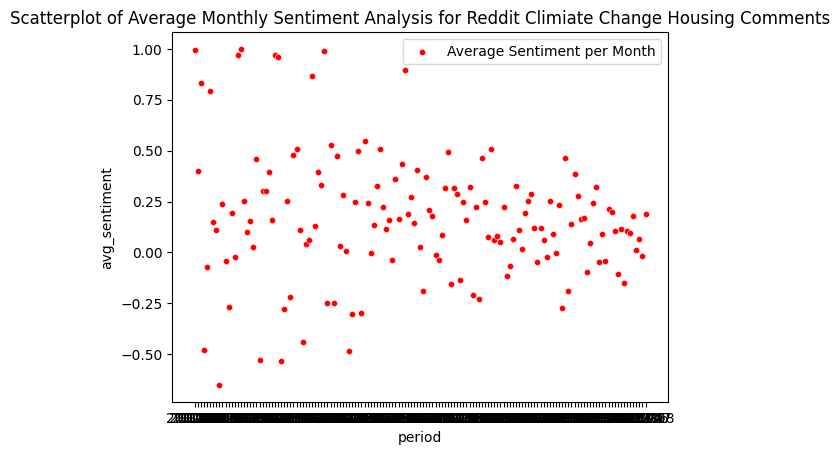

In [64]:
#import packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx

#plot a scatter plot
sns.scatterplot(x='period', y='avg_sentiment', data=monthly_avg_sentiment, color='red', marker='o', s=20, label='Average Sentiment per Month')
plt.title('Scatterplot of Average Monthly Sentiment Analysis for Reddit Climiate Change Housing Comments')
plt.legend()
plt.show()

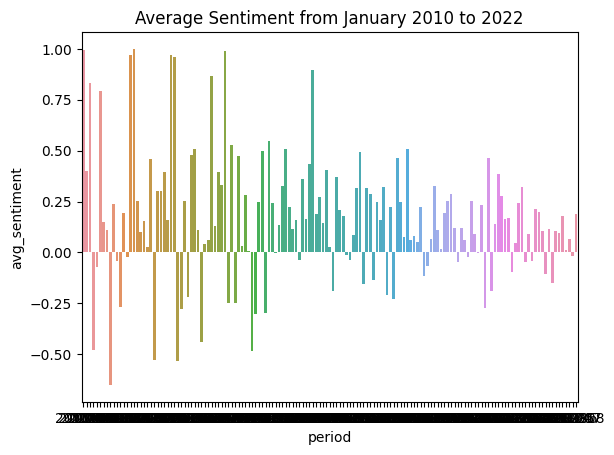

In [65]:
#plot a bar chart for all data
sns.barplot(x = 'period',
            y = 'avg_sentiment',
            data = monthly_avg_sentiment)
plt.title('Average Sentiment from January 2010 to 2022')
# Show the plot
plt.show()

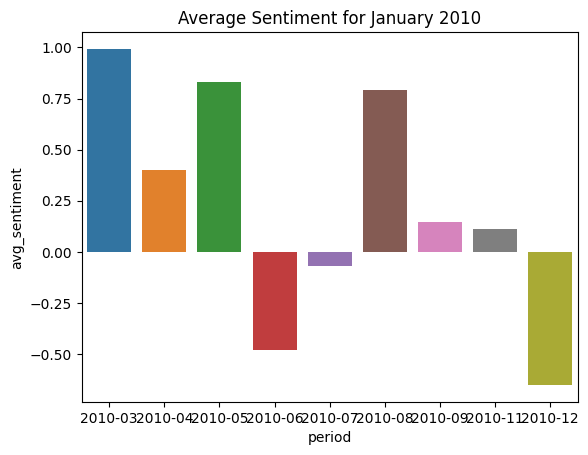

In [66]:
#plot a bar chart for 2010
year_2010_data = monthly_avg_sentiment[monthly_avg_sentiment['period'].str.contains('2010')]
sns.barplot(x = 'period',
            y = 'avg_sentiment',
            data = year_2010_data)
plt.title('Average Sentiment for January 2010')
# Show the plot
plt.show()

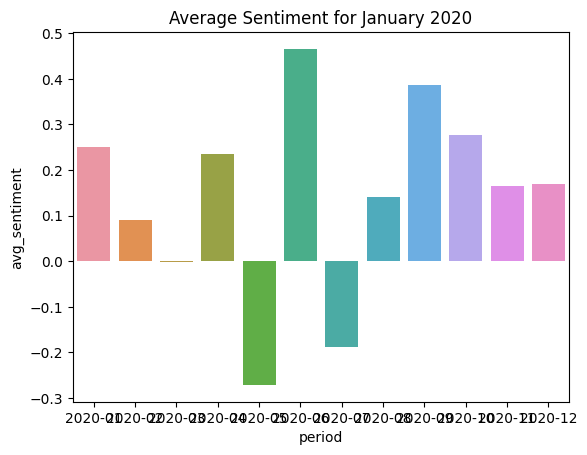

In [67]:
#plot a bar chart for 2020
year_2020_data = monthly_avg_sentiment[monthly_avg_sentiment['period'].str.contains('2020')]
sns.barplot(x = 'period',
            y = 'avg_sentiment',
            data = year_2020_data)
plt.title('Average Sentiment for January 2020')
# Show the plot
plt.show()

In [68]:
print(monthly_avg_sentiment.columns)


Index(['period', 'avg_sentiment'], dtype='object')


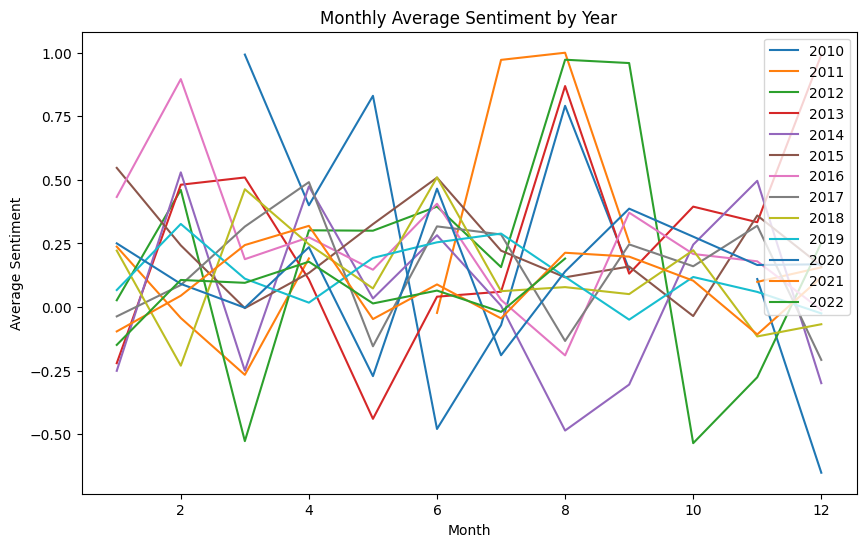

In [69]:
#plot each year on top of one another as a line chart for comparison

# Ensure 'period' is in datetime format and set as index
monthly_avg_sentiment['period'] = pd.to_datetime(monthly_avg_sentiment['period'])
monthly_avg_sentiment.set_index('period', inplace=True)

# Pivoting the data
pivoted_data = monthly_avg_sentiment.pivot_table(index=monthly_avg_sentiment.index.month, 
                                             columns=monthly_avg_sentiment.index.year,
                                             values='avg_sentiment',
                                             aggfunc='mean')

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for year in pivoted_data.columns:
    plt.plot(pivoted_data.index, pivoted_data[year], label=year)

plt.legend()
plt.title('Monthly Average Sentiment by Year')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.show()


In [78]:
#extract human names using spacy!

import spacy
import pandas as pd

# Load the small English model
nlp = spacy.load('en_core_web_sm')

# Assuming your DataFrame is named top_climate_housing_ds
comments = top_climate_housing_ds[['tokens', 'sentiment']].dropna()  # Drop missing values

# Empty DataFrame to store names data
names_df = pd.DataFrame(columns=['Name', 'Count', 'Total_Sentiment'])

# Process each comment
for idx, row in comments.iterrows():
    doc = nlp(row['tokens'])
    for entity in doc.ents:
        if entity.label_ == 'PERSON':  # Check if the entity is a person's name
            name = entity.text
            
            # Check if the name is already in the DataFrame
            name_idx = names_df[names_df['Name'] == name].index
            
            if not name_idx.empty:
                name_idx = name_idx[0]
                names_df.at[name_idx, 'Count'] += 1
                names_df.at[name_idx, 'Total_Sentiment'] += row['sentiment']
            else:
                new_row = {'Name': name, 'Count': 1, 'Total_Sentiment': row['sentiment']}
                names_df = pd.concat([names_df, pd.DataFrame([new_row])], ignore_index=True)
            
            # Ensure 'Count' and 'Total_Sentiment' columns are numeric
            names_df['Count'] = names_df['Count'].astype(int)
            names_df['Total_Sentiment'] = names_df['Total_Sentiment'].astype(float)

# Calculate average sentiment
names_df['Avg_Sentiment'] = names_df['Total_Sentiment'] / names_df['Count']

# Sort by Count to get the top 50 names
top_50_names_df = names_df.nlargest(50, 'Count')

# Display the DataFrame
print(top_50_names_df)

                Name  Count  Total_Sentiment  Avg_Sentiment
58           trudeau     97          86.3567       0.890275
176         covid-19     40          15.1060       0.377650
70    justin trudeau     34           7.8956       0.232224
208        marijuana     25           0.4962       0.019848
77     andrew scheer     22           1.6592       0.075418
540             bush     18          -0.2375      -0.013194
79       snc lavalin     16           6.5245       0.407781
105        doug ford     14           3.7184       0.265600
133      jody wilson     13           4.8529       0.373300
647   stephen harper     13           5.5347       0.425746
801            butts     13          12.9298       0.994600
10      donald trump     12           4.2111       0.350925
148            gt;my     12           6.0929       0.507742
803          telford     12          11.9352       0.994600
158             lgbt     11           7.8614       0.714673
188        elizabeth     11           1.

Obviously, some of these are not names, but for the most part, the model captured some of the most frequently occurring names that would make sense, like Justin Trudeau (Prime Minister of Canada) and Andrew Scheer (Member of the House of Commons of Canada)

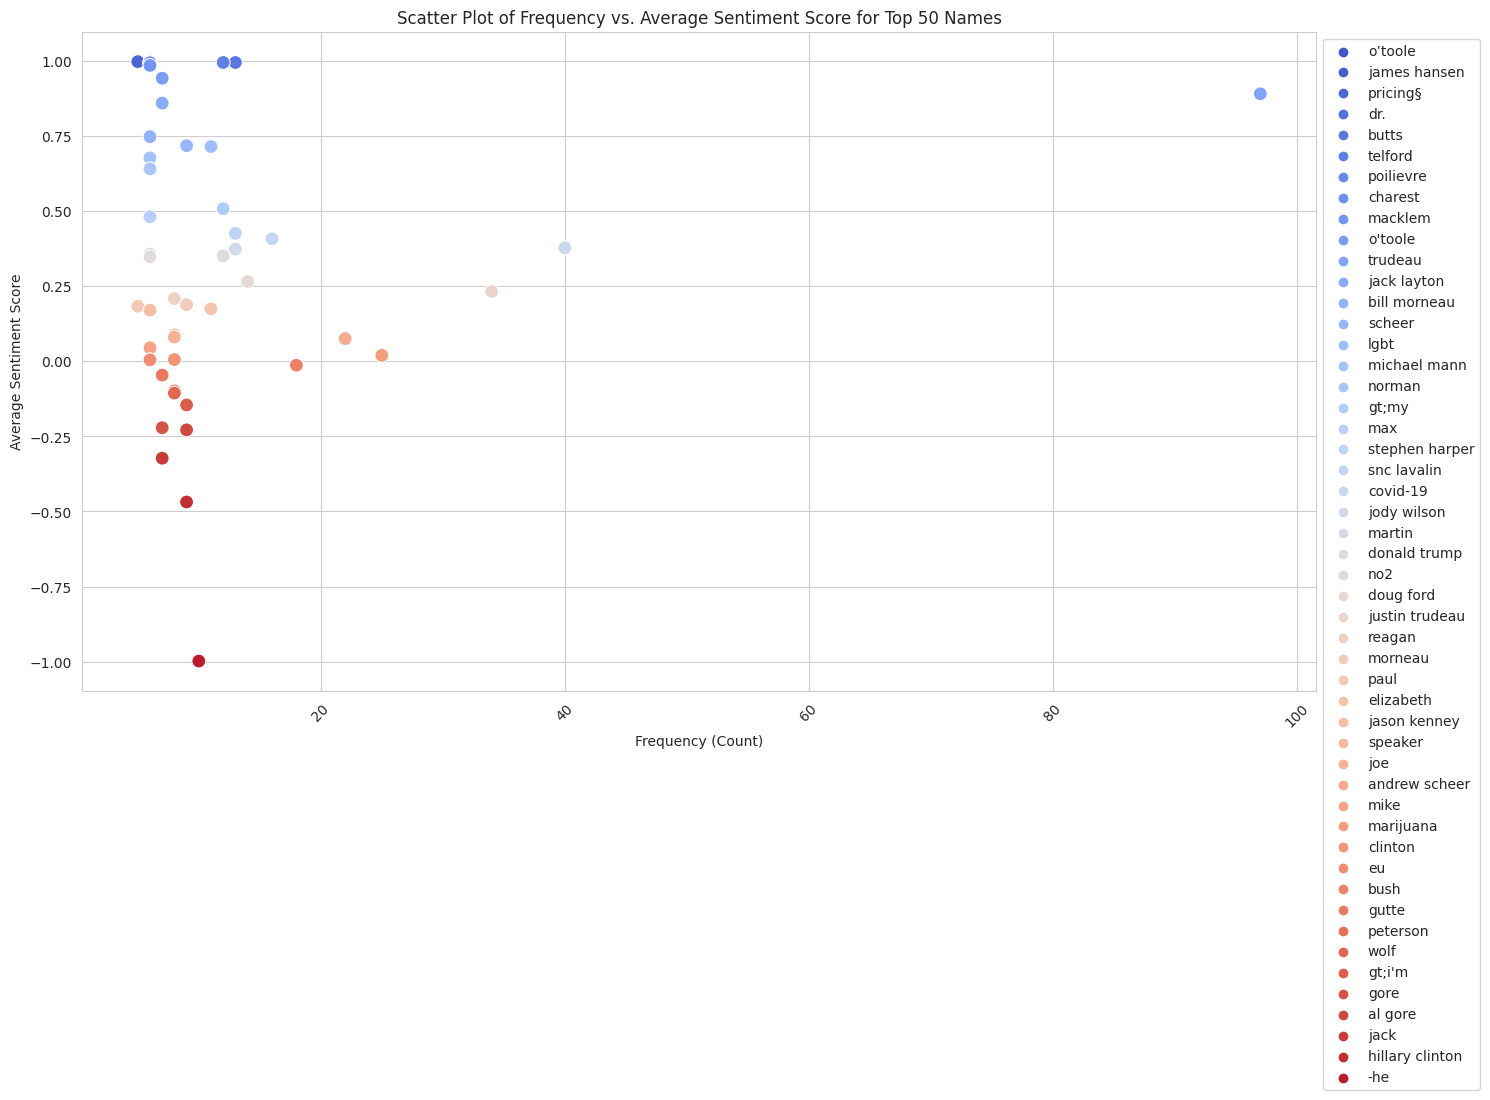

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure you have the top 50 names DataFrame ready and sorted by 'Avg_Sentiment'
top_50_names_df.sort_values(by='Avg_Sentiment', ascending=False, inplace=True)

# Generate a color palette with the same number of colors as there are names
colors = sns.color_palette("coolwarm", n_colors=len(top_50_names_df))

plt.figure(figsize=(15, 10))

# Creating the scatter plot
sns.scatterplot(
    data=top_50_names_df,
    x='Count',
    y='Avg_Sentiment',
    hue='Name',  # Color by Name
    palette=colors,  # Apply the color palette
    s=100  # Set the size of the points
)

# Adding titles and labels
plt.title('Scatter Plot of Frequency vs. Average Sentiment Score for Top 50 Names')
plt.xlabel('Frequency (Count)')
plt.ylabel('Average Sentiment Score')

# Adjusting the legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()

# Displaying the plot
plt.show()

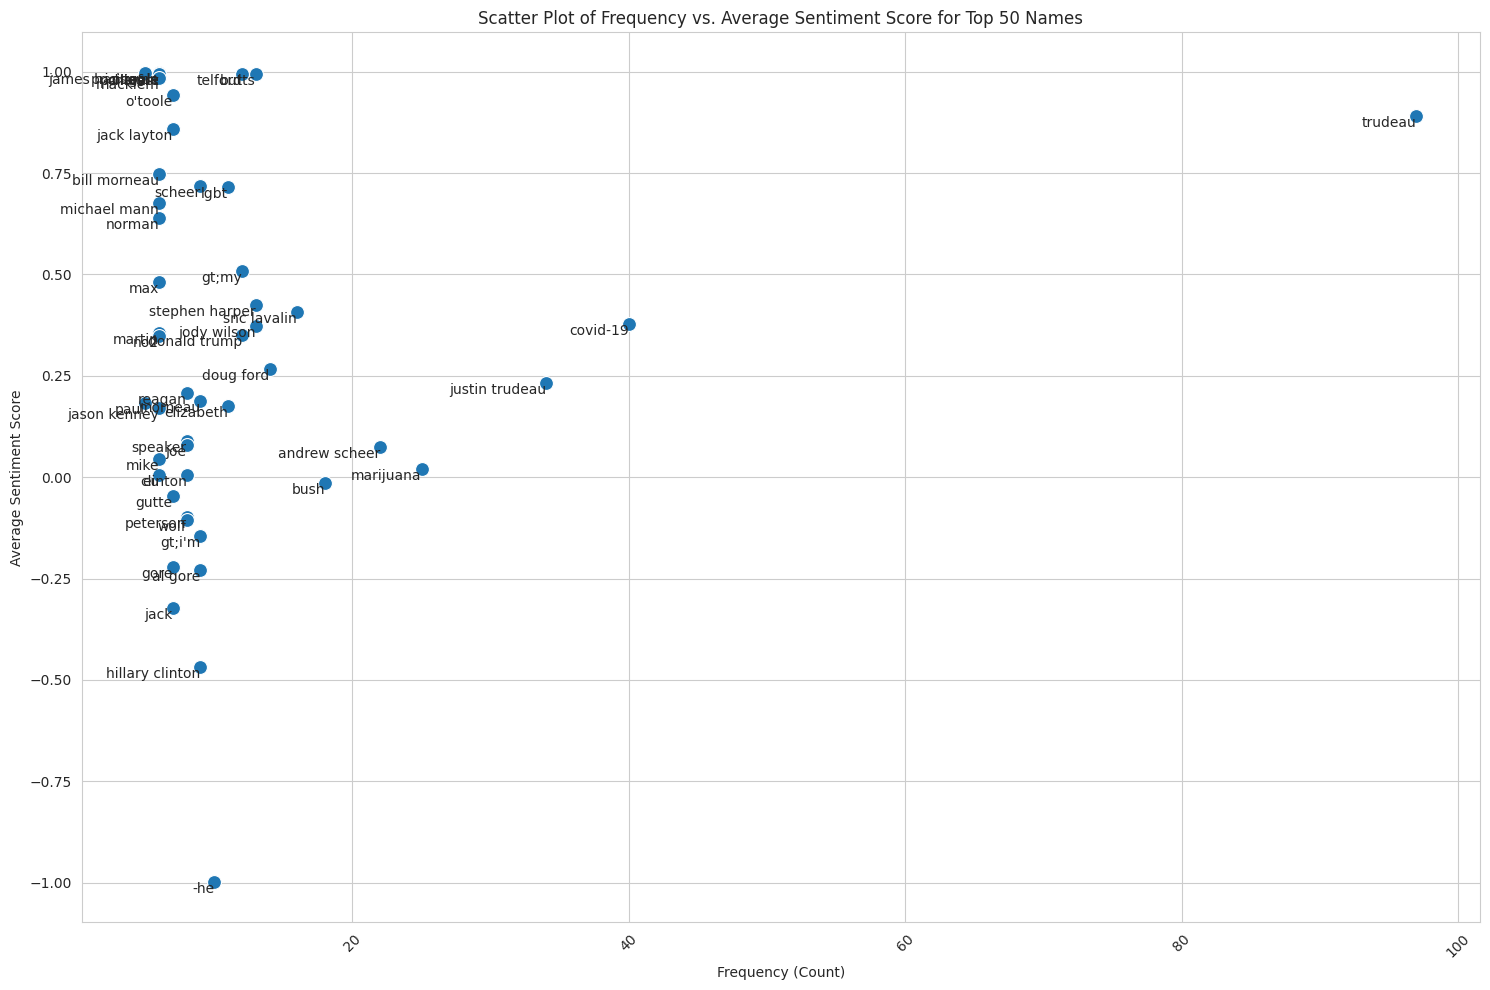

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure matplotlib is displaying inline
%matplotlib inline

# Ensure you have the top 50 names DataFrame ready
top_50_names_df.sort_values(by='Avg_Sentiment', ascending=False, inplace=True)

plt.figure(figsize=(15, 10))

# Creating the scatter plot
plot = sns.scatterplot(
    data=top_50_names_df,
    x='Count',
    y='Avg_Sentiment',
    s=100  # Set the size of the points
)

# Adding titles and labels
plt.title('Scatter Plot of Frequency vs. Average Sentiment Score for Top 50 Names')
plt.xlabel('Frequency (Count)')
plt.ylabel('Average Sentiment Score')

# Adding text labels
for i, row in top_50_names_df.iterrows():
    plot.text(row['Count'], row['Avg_Sentiment'], row['Name'], 
              horizontalalignment='right', 
              verticalalignment='top', 
              fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()

# Displaying the plot
plt.show()


In [79]:
#repeat the same process but for locations

import spacy
import pandas as pd

# Load the small English model
nlp = spacy.load('en_core_web_sm')

# Assuming your DataFrame is named top_climate_housing_ds
comments = top_climate_housing_ds[['tokens', 'sentiment']].dropna()  # Drop missing values

# Empty DataFrame to store location data
locations_df = pd.DataFrame(columns=['Location', 'Count', 'Total_Sentiment'])

# Process each comment
for idx, row in comments.iterrows():
    doc = nlp(row['tokens'])
    for entity in doc.ents:
        if entity.label_ == 'GPE':  # Check if the entity is a location
            location = entity.text
            
            # Check if the location is already in the DataFrame
            location_idx = locations_df[locations_df['Location'] == location].index
            
            if not location_idx.empty:
                location_idx = location_idx[0]
                locations_df.at[location_idx, 'Count'] += 1
                locations_df.at[location_idx, 'Total_Sentiment'] += row['sentiment']
            else:
                new_row = {'Location': location, 'Count': 1, 'Total_Sentiment': row['sentiment']}
                locations_df = pd.concat([locations_df, pd.DataFrame([new_row])], ignore_index=True)
            
            # Ensure 'Count' and 'Total_Sentiment' columns are numeric
            locations_df['Count'] = locations_df['Count'].astype(int)
            locations_df['Total_Sentiment'] = locations_df['Total_Sentiment'].astype(float)

# Calculate average sentiment
locations_df['Avg_Sentiment'] = locations_df['Total_Sentiment'] / locations_df['Count']

# Sort by Count to get the top 50 locations
top_50_locations_df = locations_df.nlargest(50, 'Count')

# Display the DataFrame
print(top_50_locations_df)

             Location  Count  Total_Sentiment  Avg_Sentiment
1              canada   1163         319.8611       0.275031
6               china    344          14.9027       0.043322
2             toronto    259         122.6970       0.473734
14             russia    112          34.5954       0.308888
0               paris    104          37.7407       0.362891
7                u.s.    103          38.4837       0.373628
15              india     86          -1.5239      -0.017720
47            alberta     57           0.9422       0.016530
43            calgary     46          21.9999       0.478259
37            america     45          -6.7553      -0.150118
61         california     44          16.8083       0.382007
31              singh     42          22.7975       0.542798
58              japan     39          10.4914       0.269010
30       saudi arabia     33           7.1159       0.215633
12             quebec     32          12.9399       0.404372
34      united states   

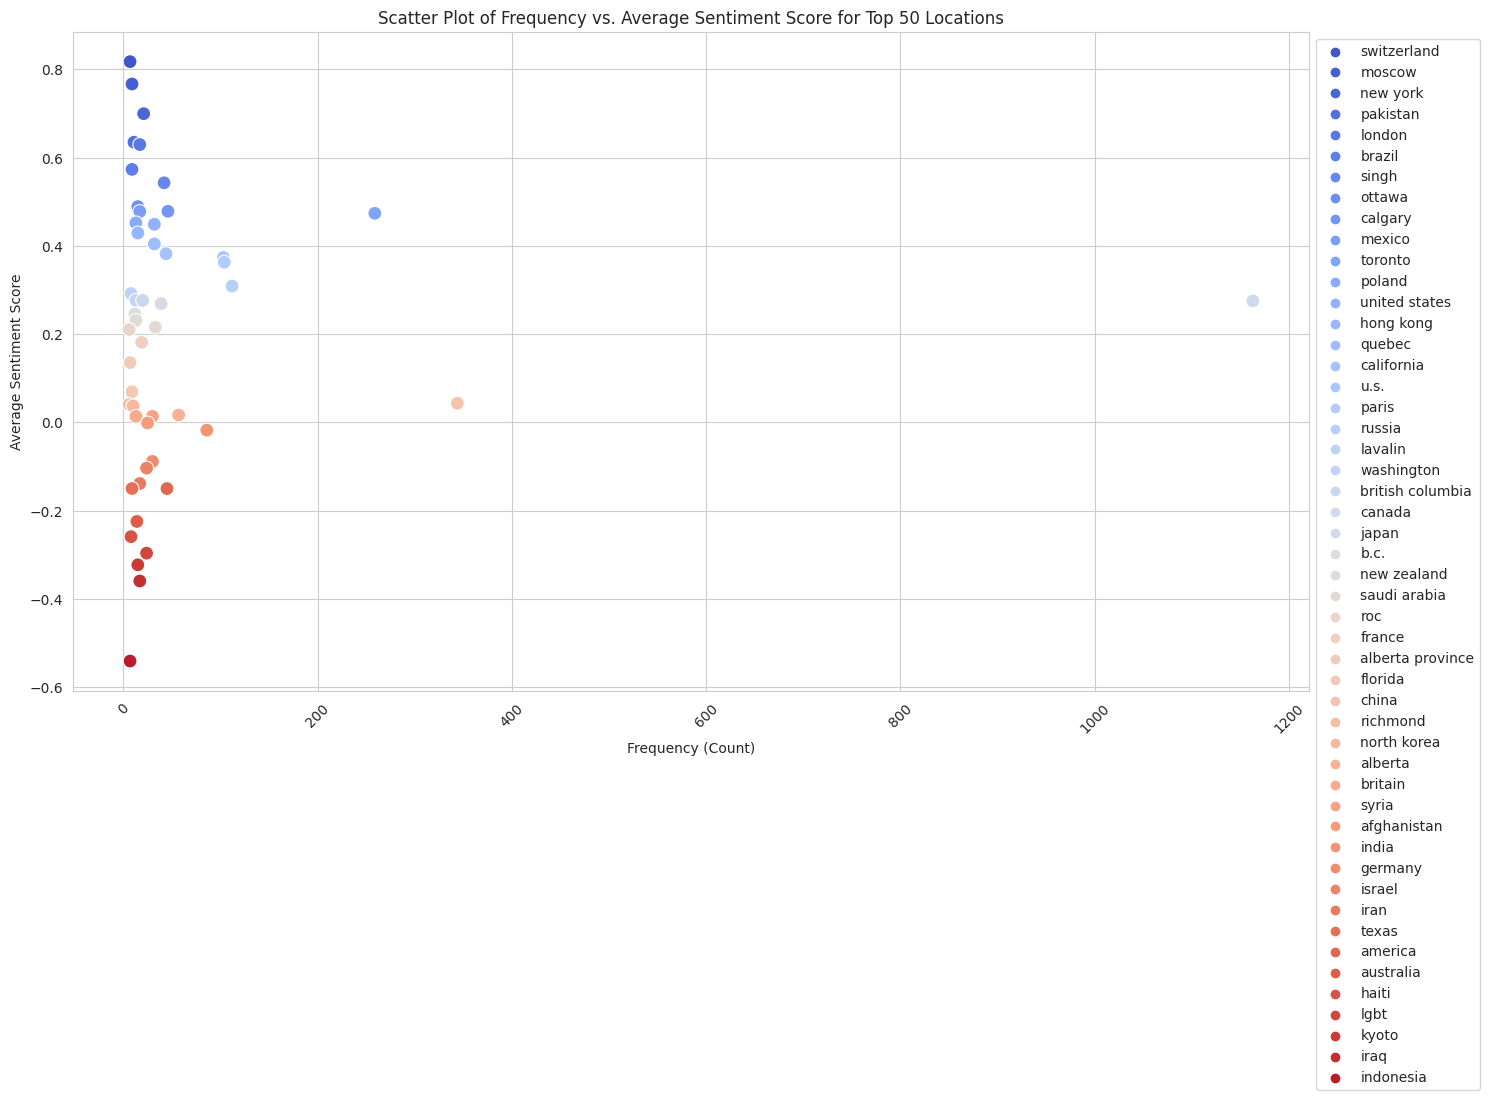

In [83]:
#make a scatterplot of the data

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# sort the DataFrame by 'Avg_Sentiment'
top_50_locations_df.sort_values(by='Avg_Sentiment', ascending=False, inplace=True)

# generate a color palette with the same number of colors as there are locations
colors = sns.color_palette("coolwarm", n_colors=len(top_50_locations_df))

plt.figure(figsize=(15, 10))

sns.scatterplot(
    data=top_50_locations_df,
    x='Count',
    y='Avg_Sentiment',
    hue='Location',  # Color by Location
    palette=colors,  # Apply the color palette
    s=100  # Set the size of the points
)

# titles and labels
plt.title('Scatter Plot of Frequency vs. Average Sentiment Score for Top 50 Locations')
plt.xlabel('Frequency (Count)')
plt.ylabel('Average Sentiment Score')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Part 3: Generating 20 topic clustesr from comment text data
- Then reclassify post and comment dat
- Calcualte average sentiment
- Visualize clustesrs and keywords in each cluster
- Note: stop words have already been removed

In [90]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import Phrases

# Preparing text data (ensure it is preprocessed)
texts = top_climate_housing_ds['tokens'].dropna().str.split()

# Creating bigrams
bigram = Phrases(texts, min_count=5)  # You can modify the parameters to suit your needs
texts = [bigram[line] for line in texts]

# Creating the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(texts)

# Converting a list of documents (corpus) into Document-Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in texts]

# Creating the object for LDA model using gensim library
lda = LdaModel

# Running and Training LDA model on the document-term matrix
lda_model = lda(doc_term_matrix, num_topics=20, id2word=dictionary, passes=50)

# Results
topics = lda_model.print_topics(num_words=2)  # You can modify the number of words in each topic
for topic in topics:
    print(topic)

(0, '0.010*"gt" + 0.009*"rent_control"')
(1, '0.022*"firearm" + 0.014*"gt_gt"')
(2, '0.012*"wolf" + 0.008*"nunavut"')
(3, '0.020*"canada" + 0.019*"climate_change"')
(4, '0.022*"lng" + 0.014*"°_c"')
(5, '0.009*"company" + 0.007*"rebate"')
(6, '0.015*"carbon" + 0.011*"climate"')
(7, '0.011*"climate" + 0.009*"canadian"')
(8, '0.013*"seal" + 0.008*"entitle"')
(9, '0.019*"not" + 0.017*"climate_change"')
(10, '0.009*"sidewalk" + 0.008*"mess"')
(11, '0.020*"not" + 0.017*"climate_change"')
(12, '0.022*"party" + 0.016*"senate"')
(13, '0.020*"temperature" + 0.015*"warm"')
(14, '0.011*"government" + 0.010*"canada"')
(15, '0.020*"not" + 0.012*"gt"')
(16, '0.017*"-canadian" + 0.011*"arctic"')
(17, '0.038*"forest" + 0.016*"log"')
(18, '0.022*"canada" + 0.017*"say"')
(19, '0.006*"bicycle" + 0.005*"fitness"')


In [94]:
#reclassify

def assign_topic_to_doc(lda_model, corpus):
    topics = []
    for doc in corpus:
        topic_probs = lda_model[doc]  # get topic probabilities for the document
        dominant_topic = max(topic_probs, key=lambda x: x[1])  # get the topic with the highest probability
        topics.append(dominant_topic[0])  # assign the topic number to the document
    return topics

# Applying the function to assign a dominant topic to each document
top_climate_housing_ds.loc[:, 'topic'] = assign_topic_to_doc(lda_model, doc_term_matrix)

# Displaying the DataFrame with the new 'dominant_topic' column
pd.set_option('display.max_colwidth', None)
top_climate_housing_ds.head()


,level_0,index,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score,tokens,date_time,year,month,day,period,topic
8,8,94,comment,iml7b24,2qh68,canada,False,1661987686,https://old.reddit.com/r/canada/comments/x2ii0u/trudeaus_green_obsession_is_canadas_nightmare/iml7b24/,"I'm not running from anything.\n\nI haven't expressed a single clear position in this thread other than our politicians are clearly failing us on the topic of climate change. Which is the truth.\n\nYou keep saying ""conservatives conservatives conservatives conservatives conservatives conservatives conservatives conservatives conservatives conservatives conservatives conservatiiiiiiives!!!1!!""\n\nWhile the evidence now clearly shows that both major parties are very much guilty of not doing much of anything useful.\n\nYou can say ""Yeah but cOnSeRvAtIvEs aRe WoRsE!!1!"" Until the cows come home if you want but all you sound like is a broken record.\n\nOur emissions have increased since signing the Paris Accord. The promise to plant 10 million trees has turned into less than 200k trees in the ground many years into Trudeau's reign. Not much of anything has been done to bring back manufacturing to Canada, instead we're relying on cross ocean trade more than ever before. Trudeau is constantly flying everywhere for vanity pet projects. \n\nYour spooky conservatives have been out of power for 7 years. Are you able to look at the past 7 years without blurting out something about the cons? \n\nTrudeau had a majority, got nothing done except make things more expensive. Then Trudeau made an alliance with the NDP and still not much of anything has been done.\n\nSo all your obsessive yelling about conservatives is only showing one thing: you are wearing your tribal blinders and seem to have nothing serious to bring to the conversation.",0.7942,2,not run \n\n express single clear position thread politician clearly fail topic climate change truth \n\n say conservative conservative conservative conservative conservative conservative conservative conservative conservative conservative conservative conservatiiiiiiives!!!1 \n\n evidence clearly show major party guilty not useful \n\n yeah conservatives worse!!1 cow come home want sound like broken record \n\n emission increase sign paris accord promise plant 10 million tree turn 200k tree ground year trudeau reign not bring manufacturing canada instead rely cross ocean trade trudeau constantly fly vanity pet project \n\n spooky conservative power 7 year able look past 7 year blurt con \n\n trudeau majority get thing expensive trudeau alliance ndp not \n\n obsessive yell conservative show thing wear tribal blinder bring conversation,2022-08-31 23:14:46,2022,8,31,2022-08,9
116,116,1996,comment,imhpvaq,2qh68,canada,False,1661928446,https://old.reddit.com/r/canada/comments/x1ws2a/can_canada_handle_its_coming_population_boom/imhpvaq/,"""Many have much lower carbon footprints in their home countries""\n\nBingo!\n\nAnd until thats mentioned formally by any level of federal government, anything about carbon footprint, climate change etc, goes in one ear and out the other.\n\nWe are importing the problem and then asking everyone to reduce their quality of life. \n\nThis only gets worse.",-0.8070,5,low carbon footprint home country \n\n bingo \n\n s mention formally level federal government carbon footprint climate change etc go ear \n\n import problem ask reduce quality life \n\n get bad,2022-08-31 06:47:26,2022,8,31,2022-08,11
159,159,2782,comment,imfoh43,2qh68,canada,False,1661892162,https://old.reddit.com/r/canada/comments/x1i0vn/eric_nuttall_canada_needs_to_stop_dithering_and/imfoh43/,"But we “don’t need it”. It’s been discussed here multiple times… we don’t need need it. No one needs natural gas. It’s a scam. We can all convert to electricity overnight. \n\nWe won’t supply the globe with our natural gas because it’s bad and we don’t need the money. /s\n\nClimate change issues are not solved b